In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [227]:
# df- dataframe pf stock prices
df = pd.read_csv('MSFT.csv', index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [228]:
df.shape

(9083, 6)

<Axes: xlabel='Date'>

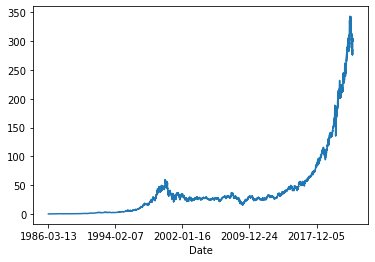

In [229]:
df['Close'].plot()

<Axes: xlabel='Date'>

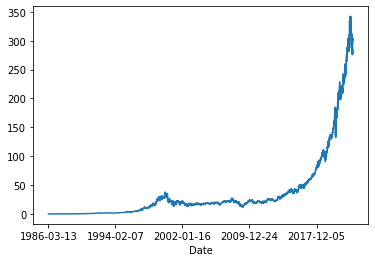

In [230]:
df['Adj Close'].plot()

In [231]:
df.isnull().values.any()

False

In [232]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


### seperate input and output variables

In [233]:
# output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df[['Close']]

In [234]:
df.iloc[:, 0:1]

,Open
Date,
1986-03-13,0.088542
1986-03-14,0.097222
1986-03-17,0.100694
1986-03-18,0.102431
1986-03-19,0.099826
...,...
2022-03-18,295.369995
2022-03-21,298.890015
2022-03-22,299.799988


In [235]:
# train_set = df.iloc[:, 0:1].values

In [236]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
scaled_features

array([[0.00000000e+00, 2.73157923e-05, 0.00000000e+00, 2.02437349e-05,
        1.00000000e+00],
       [2.51936359e-05, 2.97987861e-05, 2.53718474e-05, 3.03656023e-05,
        2.97096179e-01],
       [3.52710903e-05, 3.22817798e-05, 3.55205863e-05, 3.54294513e-05,
        1.27119118e-01],
       ...,
       [8.69910260e-01, 8.72217322e-01, 8.73053005e-01, 8.86158182e-01,
        2.45712224e-02],
       [8.71971094e-01, 8.67154105e-01, 8.69983865e-01, 8.72835309e-01,
        2.27408894e-02],
       [8.67994694e-01, 8.69928882e-01, 8.71737697e-01, 8.86274817e-01,
        2.15087197e-02]])

In [237]:
# create sequences

def create_sequences(features, time_steps=60):
    Xs, ys = [], []
    #Xs will store the sequences of feature data.
    for i in range(len(features) - time_steps):
        Xs.append(features[i:i+time_steps])
        ys.append(features[i+time_steps, 3])
    return np.array(Xs), np.array(ys)
                

# X[i:i+time_steps] creates a sequence of time_steps length from the feature data.
# y.iloc[i+time_steps] gets the target value corresponding to the end of the sequence. 
# The sequence and the target value are appended to Xs and ys, respectively.

In [238]:
time_steps=60
# X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
# X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

X, y = create_sequences(scaled_features, time_steps)

In [239]:
X.shape

(9023, 60, 5)

### train and test set

In [240]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [241]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7218, 60, 5)
X_test shape: (1805, 60, 5)
y_train shape: (7218,)
y_test shape: (1805,)


In [242]:
y_train

array([0.00737425, 0.68771479, 0.62494873, ..., 0.08769094, 0.00139184,
       0.12136248])

In [245]:
# X_train_seq.shape

(3484, 60, 1)

In [246]:
# X_train_seq.shape[1]

60

In [247]:
# y_train_seq.shape

(3484, 1)

In [248]:
# X_test_seq.shape

(827, 60, 1)

In [249]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_26 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_34 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_27 (Dropout)        (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________


In [250]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
203/203 [==============================] - 25s 84ms/step - loss: 0.0016 - val_loss: 4.2212e-04
Epoch 2/100
203/203 [==============================] - 16s 77ms/step - loss: 5.0352e-04 - val_loss: 9.0210e-05
Epoch 3/100
203/203 [==============================] - 15s 76ms/step - loss: 4.8769e-04 - val_loss: 5.8736e-05
Epoch 4/100
203/203 [==============================] - 15s 75ms/step - loss: 4.9862e-04 - val_loss: 1.6502e-04
Epoch 5/100
203/203 [==============================] - 16s 76ms/step - loss: 4.0246e-04 - val_loss: 1.5967e-04
Epoch 6/100
203/203 [==============================] - 15s 73ms/step - loss: 3.6729e-04 - val_loss: 8.9388e-05
Epoch 7/100
203/203 [==============================] - 15s 75ms/step - loss: 3.7647e-04 - val_loss: 1.2620e-04
Epoch 8/100
203/203 [==============================] - 15s 76ms/step - loss: 3.4140e-04 - val_loss: 6.6902e-05
Epoch 9/100
203/203 [==============================] - 15s 76ms/step - loss: 3.6077e-04 - val_loss: 7.1746e-05
Epoch

203/203 [==============================] - 8s 39ms/step - loss: 2.9281e-04 - val_loss: 4.1519e-05
Epoch 75/100
203/203 [==============================] - 9s 42ms/step - loss: 2.4484e-04 - val_loss: 4.9252e-05
Epoch 76/100
203/203 [==============================] - 10s 50ms/step - loss: 2.3598e-04 - val_loss: 6.1442e-05
Epoch 77/100
203/203 [==============================] - 9s 46ms/step - loss: 2.2610e-04 - val_loss: 3.5903e-05
Epoch 78/100
203/203 [==============================] - 8s 42ms/step - loss: 2.5227e-04 - val_loss: 2.3831e-05
Epoch 79/100
203/203 [==============================] - 8s 41ms/step - loss: 2.5997e-04 - val_loss: 2.6367e-05
Epoch 80/100
203/203 [==============================] - 8s 40ms/step - loss: 2.4641e-04 - val_loss: 4.3533e-05
Epoch 81/100
203/203 [==============================] - 9s 42ms/step - loss: 2.7246e-04 - val_loss: 3.7530e-05
Epoch 82/100
203/203 [==============================] - 9s 44ms/step - loss: 2.5196e-04 - val_loss: 2.7788e-05
Epoch 83/100


In [251]:
loss = model.evaluate(X_test, y_test)
loss

57/57 [==============================] - 1s 17ms/step - loss: 5.3342e-05


5.334248271537945e-05

In [252]:
y_pred = model.predict(X_test)

57/57 [==============================] - 3s 15ms/step


In [253]:
import math

from sklearn.metrics import mean_squared_error
# print(math.sqrt(mean_squared_error(y_train_seq, train_predict)))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

0.007303592850707774


In [254]:
# Inverse transform predictions and true values to original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 3)), y_test.reshape(-1, 1), np.zeros((len(y_test), 1))), axis=1))[:, 3]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 3)), y_pred, np.zeros((len(y_pred), 1))), axis=1))[:, 3]


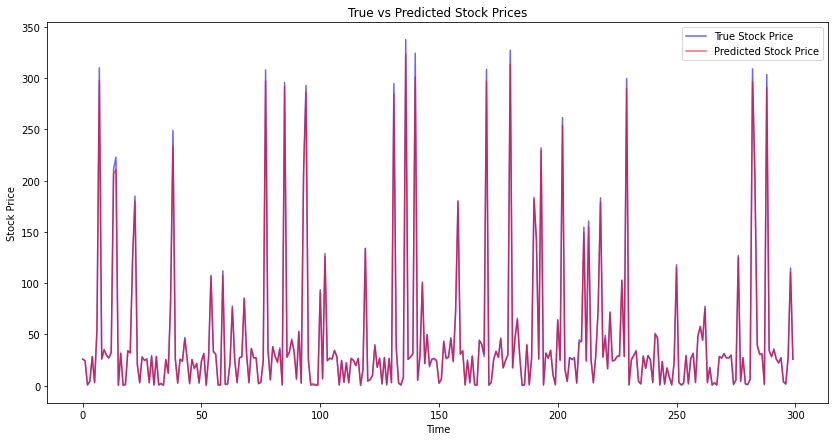

In [257]:
# Plotting true vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled[-300:], color='blue', label='True Stock Price', alpha=0.6)
plt.plot(y_pred_scaled[-300:], color='red', label='Predicted Stock Price', alpha=0.6)
plt.title('True vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

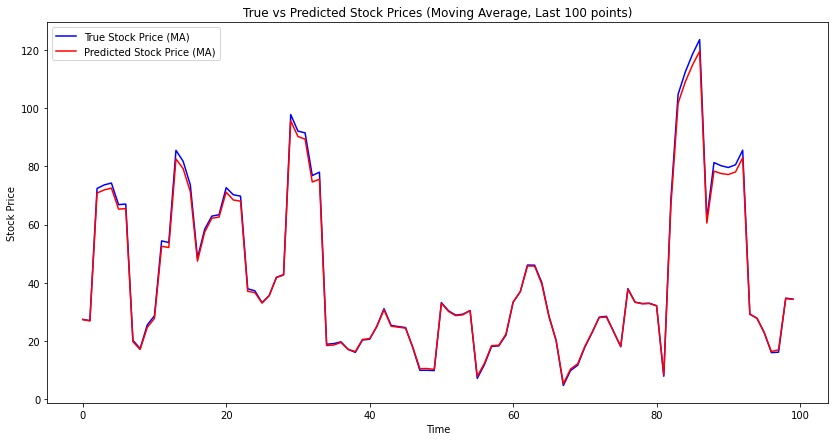

Mean Absolute Error (MAE): 1.1378


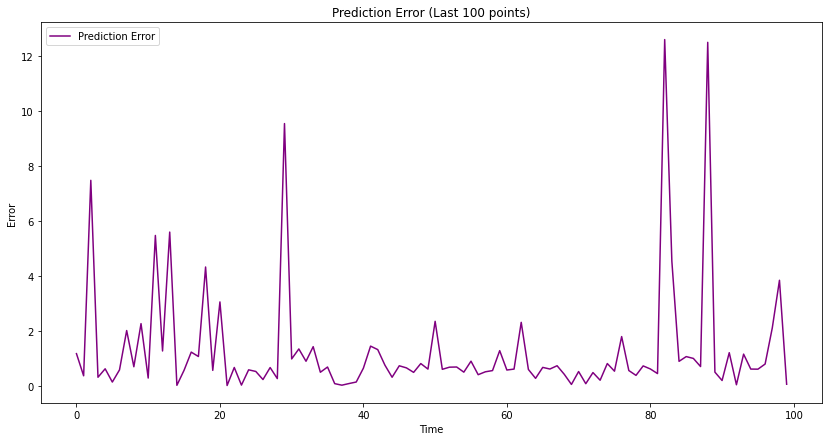

In [256]:
# Calculate and plot moving averages to smooth the curves
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

y_test_ma = moving_average(y_test_scaled, window_size=5)
y_pred_ma = moving_average(y_pred_scaled, window_size=5)

plt.figure(figsize=(14, 7))
plt.plot(y_test_ma[-100:], color='blue', label='True Stock Price (MA)')
plt.plot(y_pred_ma[-100:], color='red', label='Predicted Stock Price (MA)')
plt.title('True vs Predicted Stock Prices (Moving Average, Last 100 points)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test_scaled - y_pred_scaled))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plotting the error
errors = np.abs(y_test_scaled - y_pred_scaled)
plt.figure(figsize=(14, 7))
plt.plot(errors[-100:], color='purple', label='Prediction Error')
plt.title('Prediction Error (Last 100 points)')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()